In [1]:
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### CNN для классификации MNIST

In [2]:
class MnistCNN(nn.Module):

    def __init__(self):
      super(MnistCNN, self).__init__()

      self.model = nn.Sequential()

      # Conv Layer 1
      self.model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)) # (28, 28, 16)
      self.model.add_module('activation1', nn.ReLU())
      self.model.add_module('pool1', nn.MaxPool2d(kernel_size=2)) 

      # Conv Layer 2
      self.model.add_module('conv2', nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)) # (14, 14, 32) 
      self.model.add_module('activation2', nn.ReLU())
      self.model.add_module('pool2', nn.MaxPool2d(kernel_size=2)) # (7, 7, 32)

      self.model.add_module('flatten', nn.Flatten()) # bx7x7x32 = bx1568.

      # Linear Layer 1
      self.model.add_module('linear1', nn.Linear(in_features=1568, out_features=128))
      self.model.add_module('activation3', nn.ReLU())

      # Linear Layer 2
      self.model.add_module('linear2', nn.Linear(in_features=128, out_features=10))
      self.model.add_module('activation4', nn.LogSoftmax(dim=1)) 

      self.loss = nn.NLLLoss()

    def forward(self, images: torch.Tensor) -> torch.Tensor:
        return self.model(images)

    def cost(self, predictions: torch.Tensor, targets: torch.Tensor) -> torch.Tensor:
        return self.loss(predictions, targets.view(-1))

### Импорт датасета MNIST

In [3]:
batch_size = 256
num_epochs = 1
learning_rate = 1e-2

train_mnist = datasets.MNIST("../data", download=True, train=True, transform=transforms.ToTensor())
test_mnist = datasets.MNIST("../data", download=True, train=False, transform=transforms.ToTensor())
train_loader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_mnist, batch_size=batch_size, shuffle=False)
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

### Обучение

In [4]:
network = MnistCNN()
model_cnn = MnistCNN().to(device)
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader): # [batch, (data, target)] bx1x28x28 sized tensor

        preds = network.forward(data) # 256x1x28x28
        loss = network.cost(preds, target)

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

        if (batch_idx + 1)%10 ==0:
            print('Epoch:', '{:3d}'.format(epoch + 1),
                  '\tBatch:', '{:3d}'.format(batch_idx + 1),
                  '\tLoss:', '{:10.5f}'.format(loss.item()))

Epoch:   1 	Batch:  10 	Loss:    0.69024
Epoch:   1 	Batch:  20 	Loss:    0.26297
Epoch:   1 	Batch:  30 	Loss:    0.29980
Epoch:   1 	Batch:  40 	Loss:    0.14041
Epoch:   1 	Batch:  50 	Loss:    0.11236
Epoch:   1 	Batch:  60 	Loss:    0.10584
Epoch:   1 	Batch:  70 	Loss:    0.09378
Epoch:   1 	Batch:  80 	Loss:    0.06087
Epoch:   1 	Batch:  90 	Loss:    0.03245
Epoch:   1 	Batch: 100 	Loss:    0.18237
Epoch:   1 	Batch: 110 	Loss:    0.05103
Epoch:   1 	Batch: 120 	Loss:    0.08317
Epoch:   1 	Batch: 130 	Loss:    0.08387
Epoch:   1 	Batch: 140 	Loss:    0.09508
Epoch:   1 	Batch: 150 	Loss:    0.04950
Epoch:   1 	Batch: 160 	Loss:    0.03472
Epoch:   1 	Batch: 170 	Loss:    0.03014
Epoch:   1 	Batch: 180 	Loss:    0.03994
Epoch:   1 	Batch: 190 	Loss:    0.11162
Epoch:   1 	Batch: 200 	Loss:    0.03978
Epoch:   1 	Batch: 210 	Loss:    0.10057
Epoch:   1 	Batch: 220 	Loss:    0.10133
Epoch:   1 	Batch: 230 	Loss:    0.02127


In [5]:
# Точность вычислений на тренировочном наборе
count = 0
for batch_idx, (data, target) in enumerate(train_loader):
    _, preds = torch.max(network.forward(data), dim=1)
    count += torch.sum(preds == target).detach().item()
    print("Training Accuracy : ", "{:.2f}".format(float(count) / train_loader.dataset.data.size(0)*100, "%"))

# Точность вычислений на тестовом наборе
count = 0
for batch_idx, (data, target) in enumerate(test_loader):
    _, preds = torch.max(network.forward(data), dim=1)
    count += torch.sum(preds == target).detach().item()
    print("Test Accuracy : ", "{:.2f}".format(float(count) / test_loader.dataset.data.size(0)*100, "%"))

Training Accuracy :  0.41
Training Accuracy :  0.83
Training Accuracy :  1.26
Training Accuracy :  1.68
Training Accuracy :  2.10
Training Accuracy :  2.52
Training Accuracy :  2.93
Training Accuracy :  3.34
Training Accuracy :  3.77
Training Accuracy :  4.18
Training Accuracy :  4.60
Training Accuracy :  5.02
Training Accuracy :  5.44
Training Accuracy :  5.85
Training Accuracy :  6.27
Training Accuracy :  6.69
Training Accuracy :  7.11
Training Accuracy :  7.54
Training Accuracy :  7.95
Training Accuracy :  8.37
Training Accuracy :  8.78
Training Accuracy :  9.20
Training Accuracy :  9.62
Training Accuracy :  10.04
Training Accuracy :  10.46
Training Accuracy :  10.87
Training Accuracy :  11.29
Training Accuracy :  11.71
Training Accuracy :  12.13
Training Accuracy :  12.55
Training Accuracy :  12.97
Training Accuracy :  13.38
Training Accuracy :  13.80
Training Accuracy :  14.21
Training Accuracy :  14.64
Training Accuracy :  15.05
Training Accuracy :  15.47
Training Accuracy :  15.

### FGSM attack

In [22]:
def fgsm_attack(image, epsilon, loss_gradient):

    # Вычисляем градиент относительно ввода
    signed_grad = loss_gradient.sign()

    # Создаем состязательное изображение, отрегулировав каждый пиксель входного изображения.
    perturbed_image = image + epsilon*signed_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    
    # Возвращаем состязательное изображение
    return epsilon*signed_grad, perturbed_image

In [23]:
# Вычисление точности сети на состязательном тестовом наборе
def computeAccuracyAdversarial(batch_idx, perturbed_data, target):
    final_pred = torch.argmax(network.forward(perturbed_data), dim=1)
    return torch.sum(final_pred == target).detach().item()

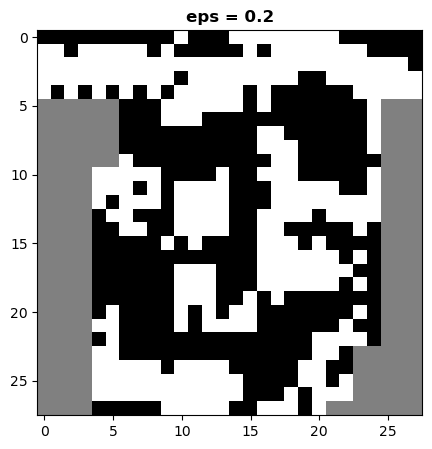

In [24]:
def GenerateAdvFGSM (network, test_loader, epsilon):

    count = 0
    adv_batch_datasets = []
      
    for batch_idx, (data, target) in enumerate(test_loader):

        copied_data = data.detach().clone()
        data.requires_grad = True

        for param in network.parameters():
            param.requires_grad = False

        preds = network.forward(data)
        copied_data.requires_grad = True        
        preds2 = network.forward(copied_data)
        copied_preds = torch.argmax(preds2, dim=1)
        copied_loss = network.cost(preds2, target)
        network.zero_grad() 
        copied_loss.backward()

        copied_data_grad = copied_data.grad

        # Создание состязательных примеры с помощью FGSM
        delta, perturbed_data = fgsm_attack(copied_data, epsilon, copied_data_grad)

        # Сохранение состязательных примеров в датасет
        current_batch_dataset = torch.utils.data.TensorDataset(perturbed_data.detach(), target)
        adv_batch_datasets.append(current_batch_dataset)
        adv_dataset = torch.utils.data.ConcatDataset(adv_batch_datasets)

        # Загрузка датасета в dataloader
        adv_train_loader = torch.utils.data.DataLoader(adv_dataset, batch_size=256, shuffle=False)
    
    return delta, adv_train_loader, adv_dataset
    
epsilon = 0.2
delta, adv_train_loader, adv_dataset = GenerateAdvFGSM (network, test_loader, epsilon)

#Наложенный шум (epsilon*signed_grad)
fig = plt.figure(figsize=(8, 5))
rows = 1; columns = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(delta.detach().numpy()[0][0], cmap='gray')
plt.title("eps = 0.2", fontweight="bold")
plt.show()

For epsilon =  0.2 

Original Image - 
	Predicted label:  0 	 Target :  0

Perturbed Image - 
	Predicted label : 7 	 Target :  0




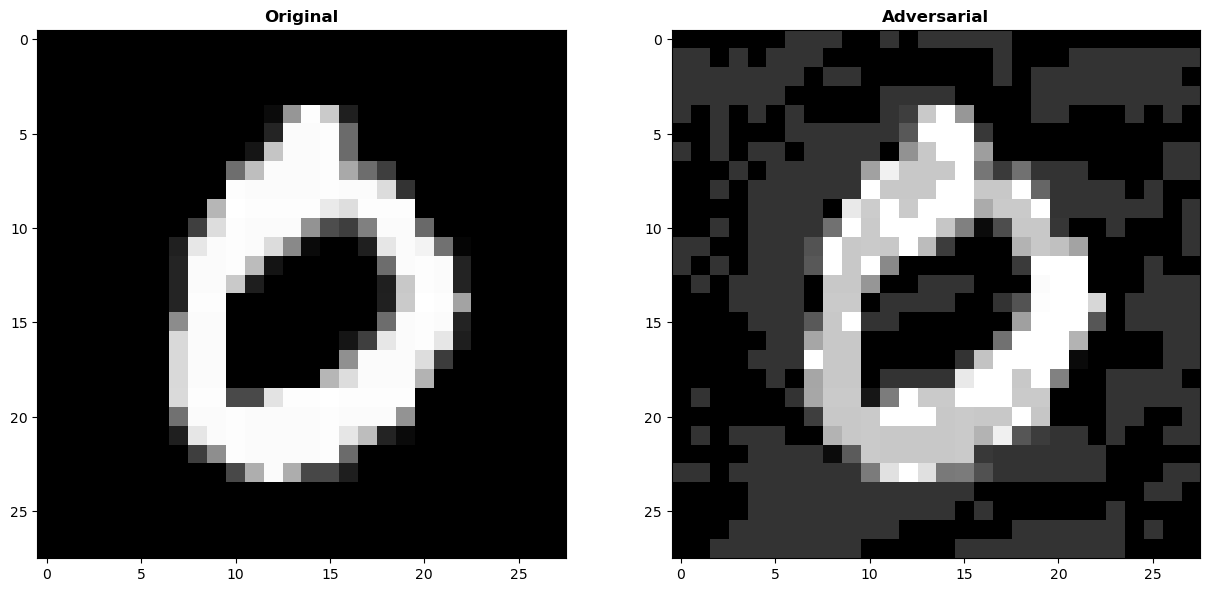

In [25]:
# Посмотрим что получилось
print("For epsilon = ", epsilon, "\n")

adv_ex_misclassified = []
adv_indices = []
count=0; i=0

for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(adv_train_loader):
        preds = network.forward(data)
        final_preds = torch.argmax(preds, dim=1)
        for i in range(512):
            if final_preds[i]!=target[i]:
                count+=1
                adv_ex_misclassified.append(data[i][0])
                adv_indices.append(i)
                if (count > 4): break
        break

from random import randrange
i = randrange(4) 
adv_index = adv_indices[i]

fig = plt.figure(figsize=(15, 11))
rows = 1; columns = 2

# исходное изображение
for batch_idx, (data, target) in enumerate(test_loader):
  
    preds = network.forward(data[adv_index].unsqueeze(0))
    print("Original Image -", "\n\tPredicted label: ", torch.argmax(preds, dim=1).item(), "\t Target : ", target[adv_index].item())
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[adv_index][0], cmap='gray')
    plt.title("Original", fontweight="bold")
    plt.savefig('Original.png')
    break

# состязательный пример
for batch_idx, (data, target) in enumerate(adv_train_loader):
  
    preds = network.forward(data[adv_index].unsqueeze(0))
    print("\nPerturbed Image -", "\n\tPredicted label :", torch.argmax(preds, dim=1).item(), "\t Target : ", target[adv_index].item())
    print("\n")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(data[adv_index][0], cmap='gray')
    plt.title("Adversarial", fontweight="bold")
    plt.savefig('Adversarial.png')
    break

In [26]:
# Точность сети на состязательных примерах
count = 0
for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(adv_train_loader):
        preds = network.forward(data)
        
        count += computeAccuracyAdversarial(batch_idx, data, target)
        print("Test Accuracy : ", "{:.2f}".format(float(count) / len(adv_dataset)*100), "%")

Test Accuracy :  0.80 %
Test Accuracy :  1.42 %
Test Accuracy :  2.15 %
Test Accuracy :  2.92 %
Test Accuracy :  3.56 %
Test Accuracy :  4.18 %
Test Accuracy :  4.88 %
Test Accuracy :  5.55 %
Test Accuracy :  6.24 %
Test Accuracy :  6.90 %
Test Accuracy :  7.63 %
Test Accuracy :  8.33 %
Test Accuracy :  9.01 %
Test Accuracy :  9.63 %
Test Accuracy :  10.43 %
Test Accuracy :  11.04 %
Test Accuracy :  11.63 %
Test Accuracy :  12.33 %
Test Accuracy :  12.99 %
Test Accuracy :  13.76 %
Test Accuracy :  14.63 %
Test Accuracy :  15.55 %
Test Accuracy :  16.42 %
Test Accuracy :  17.14 %
Test Accuracy :  18.36 %
Test Accuracy :  19.14 %
Test Accuracy :  20.06 %
Test Accuracy :  21.01 %
Test Accuracy :  21.63 %
Test Accuracy :  22.39 %
Test Accuracy :  23.26 %
Test Accuracy :  24.23 %
Test Accuracy :  24.87 %
Test Accuracy :  25.93 %
Test Accuracy :  27.16 %
Test Accuracy :  28.09 %
Test Accuracy :  29.16 %
Test Accuracy :  29.82 %
Test Accuracy :  30.50 %
Test Accuracy :  30.56 %


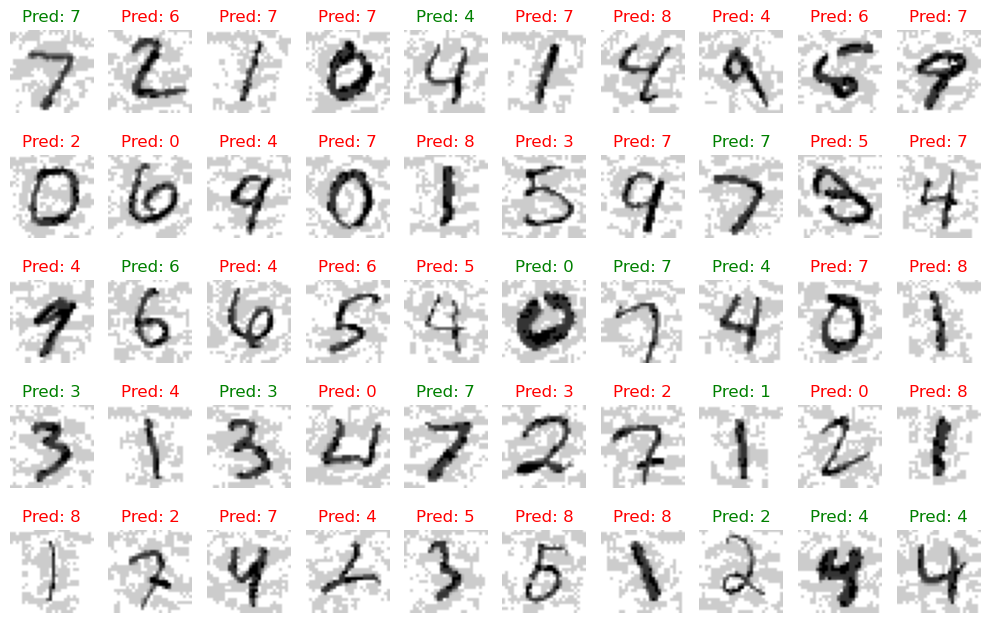

In [27]:
# Визуализация классификации состязательных примеров FGSM

for data,target in adv_train_loader:
    break

def plot_images(data,target,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-data[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == target[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()
    plt.savefig('misclassifications.png')
    

yp = network(data)
plot_images(data, target, yp, 5, 10)

### Теперь добавим к исходным данным состязательные примеры и обучим модель

In [28]:
network1 = MnistCNN() 
optimizer = optim.Adam(network1.parameters(), lr=learning_rate)

both_datasets = torch.utils.data.ConcatDataset([train_dataset, adv_dataset])
print(len(both_datasets))
both_loader = torch.utils.data.DataLoader(both_datasets, batch_size = 512)

num_epochs = 1
for epoch in range(num_epochs): 
    for batch_idx, (data, target) in enumerate(both_loader):
        
        try: 
            preds = network1(data)
            loss = network1.cost(preds, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (batch_idx + 1)%10 ==0:
                print('Epoch:', '{:3d}'.format(epoch + 1),
                '\tBatch:', '{:3d}'.format(batch_idx + 1),
                '\tLoss:', '{:10.5f}'.format(loss.item()))
            
            
        except:
            print(preds.size(), target.size(), loss, data.requires_grad)

70000
Epoch:   1 	Batch:  10 	Loss:    1.02248
Epoch:   1 	Batch:  20 	Loss:    0.37674
Epoch:   1 	Batch:  30 	Loss:    0.20197
Epoch:   1 	Batch:  40 	Loss:    0.16577
Epoch:   1 	Batch:  50 	Loss:    0.11955
Epoch:   1 	Batch:  60 	Loss:    0.08561
Epoch:   1 	Batch:  70 	Loss:    0.06758
Epoch:   1 	Batch:  80 	Loss:    0.04606
Epoch:   1 	Batch:  90 	Loss:    0.11858
Epoch:   1 	Batch: 100 	Loss:    0.05345
Epoch:   1 	Batch: 110 	Loss:    0.05396
Epoch:   1 	Batch: 120 	Loss:    0.96776
Epoch:   1 	Batch: 130 	Loss:    0.24084


In [29]:
# Точность на состязательном тестовом наборе
def computeAccuracy1Adversarial(batch_idx, perturbed_data, target):
    final_pred = torch.argmax(network1.forward(perturbed_data), dim=1)
    return torch.sum(final_pred == target).detach().item()

count = 0
# Точность вычислений на состязательных примерах после дообучения
for batch_idx, (data, target) in enumerate(adv_train_loader):
    count += computeAccuracy1Adversarial(batch_idx, data, target)
    print("Post AdvTraining Adv data Accuracy : ", "{:.2f}".format(float(count) / len(adv_dataset)*100), "%")

Post AdvTraining Adv data Accuracy :  2.42 %
Post AdvTraining Adv data Accuracy :  4.80 %
Post AdvTraining Adv data Accuracy :  7.14 %
Post AdvTraining Adv data Accuracy :  9.45 %
Post AdvTraining Adv data Accuracy :  11.64 %
Post AdvTraining Adv data Accuracy :  13.95 %
Post AdvTraining Adv data Accuracy :  16.24 %
Post AdvTraining Adv data Accuracy :  18.59 %
Post AdvTraining Adv data Accuracy :  20.94 %
Post AdvTraining Adv data Accuracy :  23.29 %
Post AdvTraining Adv data Accuracy :  25.66 %
Post AdvTraining Adv data Accuracy :  27.99 %
Post AdvTraining Adv data Accuracy :  30.37 %
Post AdvTraining Adv data Accuracy :  32.66 %
Post AdvTraining Adv data Accuracy :  34.99 %
Post AdvTraining Adv data Accuracy :  37.36 %
Post AdvTraining Adv data Accuracy :  39.67 %
Post AdvTraining Adv data Accuracy :  42.01 %
Post AdvTraining Adv data Accuracy :  44.39 %
Post AdvTraining Adv data Accuracy :  46.82 %
Post AdvTraining Adv data Accuracy :  49.27 %
Post AdvTraining Adv data Accuracy :  

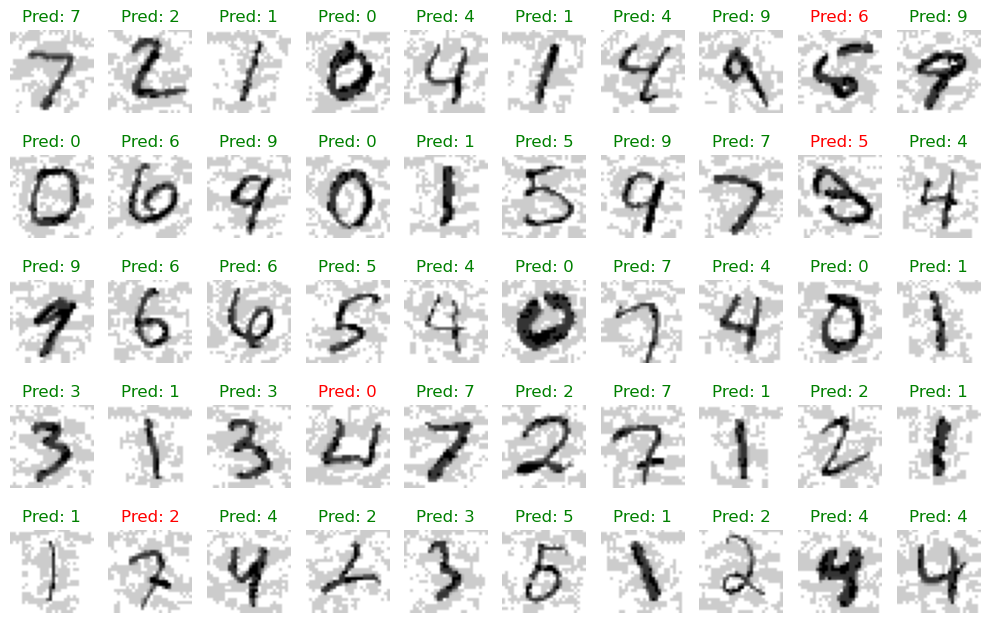

In [30]:
# Визуализация классификации состязательных примеров после adversarial training

for data,target in adv_train_loader:
    break

yp = network1(data)
plot_images(data, target, yp, 5, 10)
plt.savefig('misclassifications_after_advtraining.png')

### One pixel attack

In [6]:
def test_label_predictions(network, test_loader):
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            output = network.forward(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(network, test_loader)

In [20]:
def set_pixel(data, i, j, value=1.0):
    data[0][i][j] = value
    return data

def misclassified_images(actuals, predictions):
    vulnerables = []
    for i in range(len(actuals)):
        if actuals[i] != predictions[i]:
            vulnerables.append(i)
    return set(vulnerables) 


actuals, predictions = test_label_predictions(network, test_loader)
base_misclassifieds = misclassified_images(actuals, predictions)
vulnerable_images = set([])

for i in range(12, 13):
    for j in range(12, 13):

        test_dataset = datasets.MNIST(root='./data', 
                                train=False, 
                                download=True, 
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Lambda(lambda x: set_pixel(x, i, j)),
                                    transforms.Normalize((0.1307,), (0.3081,)),
                            ]))

        opa_test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=512)

        actuals, predictions = test_label_predictions(network, opa_test_loader)

        misclassifieds = misclassified_images(actuals, predictions)

        actual_vulnerables = misclassifieds.difference(base_misclassifieds) 

        vulnerable_images.update(actual_vulnerables)


Randomly selecting index 3392 for displaying the vulnerable image

 --> 3392 is 9, classified as 5


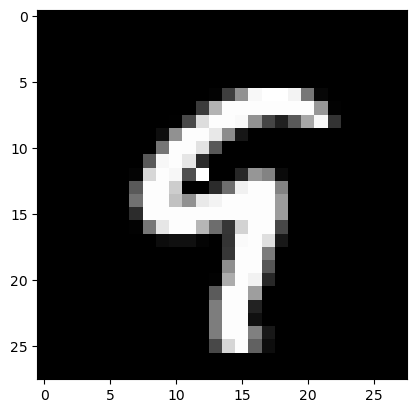

In [21]:
# Посмотрим что получилось

actual_vulnerable = list(actual_vulnerables)
choice = np.random.choice(actual_vulnerable)
print("\nRandomly selecting index", choice, "for displaying the vulnerable image")
print("\n", '--> %s is %s, classified as %s' % (choice, actuals[choice], predictions[choice]))
x, _ = test_dataset[choice] 
plt.imshow(x.numpy()[0], cmap='gray')
plt.savefig('onepixel_attack.png')

### Projected Gradient Descent (PGD)

In [32]:
def pgd(model, X, y, epsilon=3.0, alpha=0.1, num_iter=20):
    delta = torch.zeros_like(X, requires_grad=True)
        
    for t in range(num_iter):
        loss = nn.CrossEntropyLoss()(model(X + delta), y)
        loss.backward()
        #L_inifinity norm
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        #L_2 norm
        delta.data += alpha*delta.grad.detach() / norms(delta.grad.detach())
        delta.data = torch.min(torch.max(delta.detach(), -X), 1-X)
        delta.data *= epsilon / norms(delta.detach()).clamp(min=epsilon)

        delta.grad.zero_()
    
    return delta.detach()

def norms(Z):
    return Z.view(Z.shape[0], -1).norm(dim=1)[:,None,None,None]

In [33]:
def standard_epoch(loader, model, opt=None):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        yp = model(X)
        loss = nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset)

In [34]:
def adversarial_epoch(loader, model, pgd, opt=None, **kwargs):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = pgd(model, X, y, **kwargs)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset)

In [35]:
opt = optim.SGD(model_cnn.parameters(), lr=1e-1)
for t in range(10):
    train_err = standard_epoch(train_loader, model_cnn, opt)
    test_err = standard_epoch(test_loader, model_cnn)
    adv_err = adversarial_epoch(test_loader, model_cnn, pgd)
    if t == 4:
        for param_group in opt.param_groups:
            param_group["lr"] = 1e-2
    if t==0:
      print("train err \ttest err  \tadv err")
    print(*("{:.6f}".format(i) for i in (train_err, test_err, adv_err)), sep="\t")

train err 	test err  	adv err
0.247867	0.056300	0.692700
0.043350	0.029000	0.708800
0.028267	0.025800	0.719200
0.022283	0.023300	0.796400
0.018483	0.019600	0.806200
0.014400	0.013400	0.802300
0.013283	0.013400	0.804300
0.013083	0.013500	0.804800
0.012783	0.012500	0.814800
0.012550	0.012800	0.813600


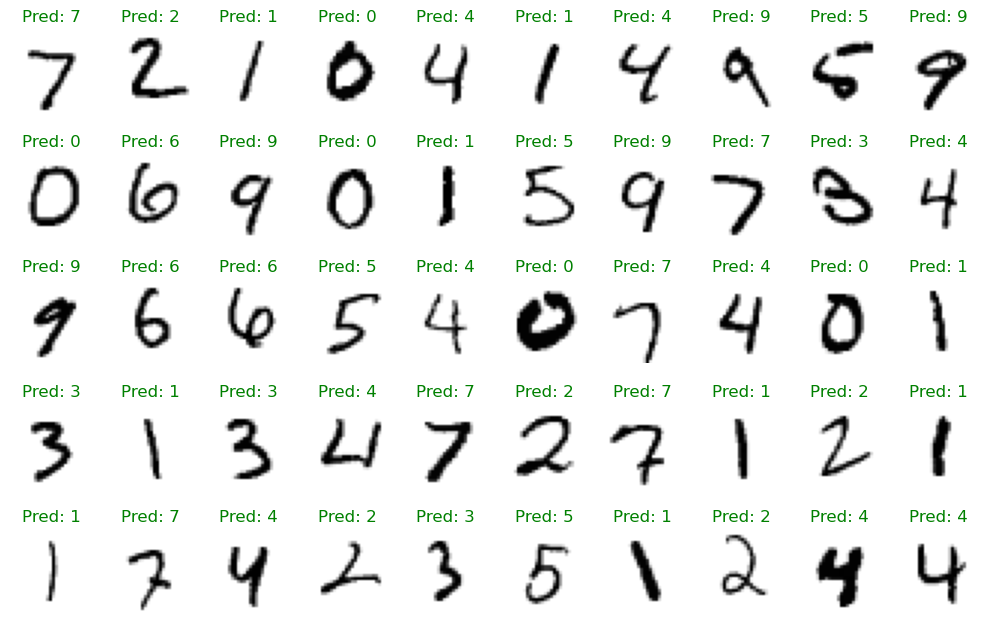

In [37]:
# Визуализация точности классификации модели на тестовых данных
yp = model_cnn(X)
plot_images(X, y, yp, 5, 10)

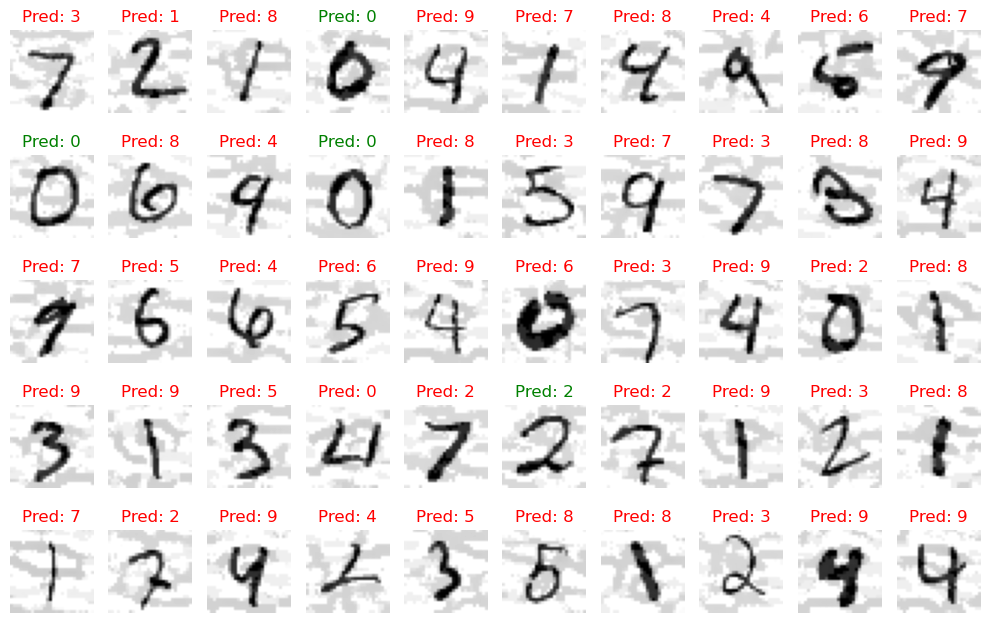

In [38]:
# Визуализация классификации состязательных примеров PGD
delta = pgd(model_cnn, X, y)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 5, 10)

### Ну и обучим сеть на состязательных примерах после PGD атаки.

In [43]:
opt = optim.SGD(model_cnn.parameters(), lr=1e-1)
for t in range(10):
    train_err = adversarial_epoch(train_loader, model_cnn, pgd, opt)
    test_err = standard_epoch(test_loader, model_cnn)
    adv_err = adversarial_epoch(test_loader, model_cnn, pgd)

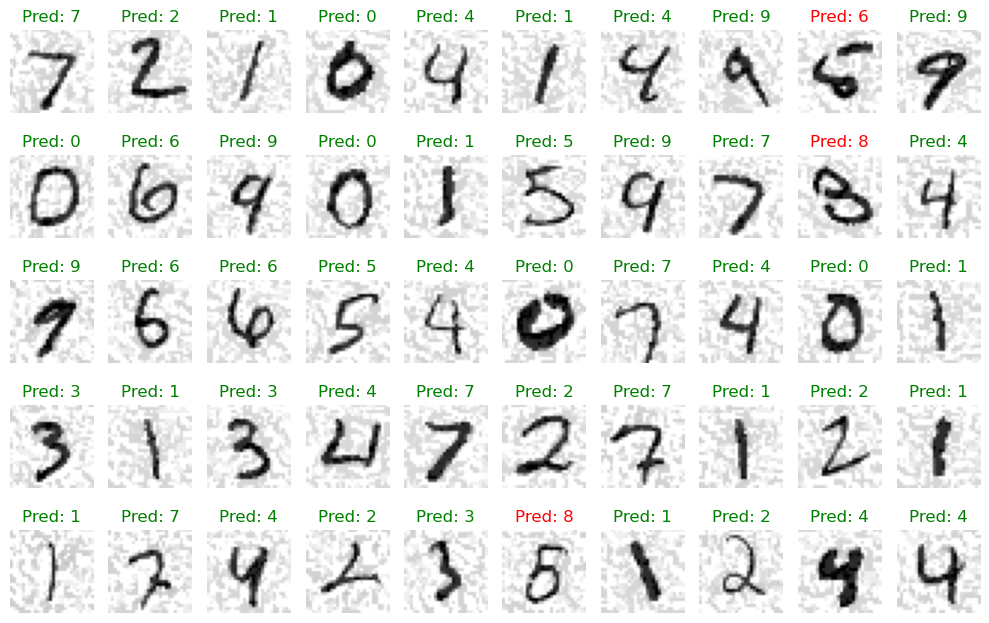

In [44]:
# Визуализация классификации состязательных примеров после adversarial training
delta = pgd(model_cnn, X, y)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 5, 10)